In [160]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import torch
import nibabel
import data.constants as constants
import nilearn.masking as masking
import numpy as np
import pandas as pd
from data import ward_tree
import nibabel
from nilearn.image import load_img, resample_img, crop_img, threshold_img, math_img
import nilearn.masking as masking
from nilearn import plotting
import itertools
mask = nibabel.load("/data/hcp/hcp_mask.nii.gz")
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# archi_args = torch.load("/data/brain_/gcn/outputs/multi_run/fgl/exp/args.checkpoint")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
chkfn = "/data/brain_/gcn/outputs/multi_run/fgl/exp_nfdim1/outer_split0/best.checkpoint"
fgl1chk = torch.load(chkfn, map_location='cpu')

chkfn = "/data/brain_/gcn/outputs/multi_run/fgl_213_max_tree/exp_fgl213/outer_split0/best.checkpoint"
fgl213chk = torch.load(chkfn, map_location='cpu')
# chkfn = "/data/brain_/gcn/outputs/multi_run/fgl/exp_nfdim0/outer_split0/last.checkpoint"
# fgl0chk = torch.load(chkfn, map_location='cpu')

chkfn = "/data/brain_/gcn/outputs/multi_run/fc/random_outer_baseline/outer_split0/best.checkpoint"
fcchk = torch.load(chkfn, map_location='cpu')
chkfn = "/data/brain_/gcn/outputs/multi_run/fc/baseline/outer_split0/test_metrics_per_epoch.checkpoint"
fcbmet = torch.load(chkfn, map_location='cpu')

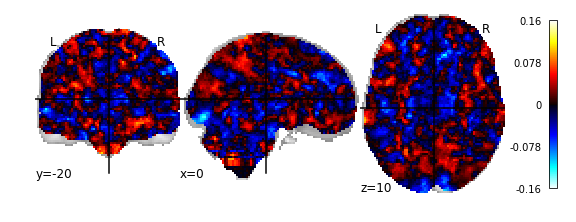

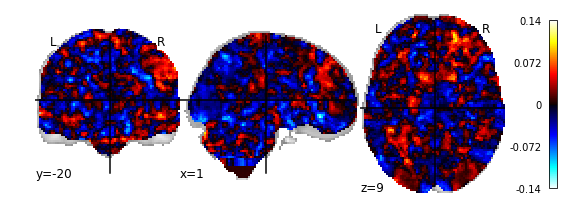

In [61]:
plotting.plot_stat_map(masking.unmask(fcchk['model']['net.0.weight_v'][26, :].numpy(), mask))
plotting.plot_stat_map(masking.unmask(fcchk['model']['net.0.weight_v'][29, :].numpy(), mask))

Confusion matrix, without normalization
[[6 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0

NameError: name 'itertools' is not defined

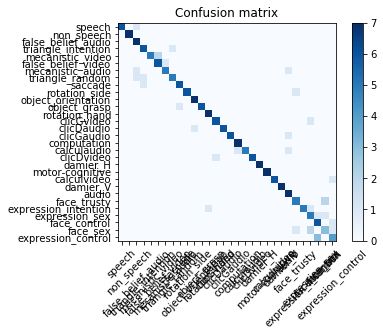

In [53]:
plot_confusion_matrix(fcbmet[-1]['cm'], [archi_args.meta['i2c'][i] for i in range(len(archi_args.meta['i2c']))])


In [52]:
[archi_args.meta['i2c'][i] for i in range(len(archi_args.meta['i2c']))]

['speech',
 'non_speech',
 'false_belief_audio',
 'triangle_intention',
 'mecanistic_video',
 'false_belief_video',
 'mecanistic_audio',
 'triangle_random',
 'saccade',
 'rotation_side',
 'object_orientation',
 'object_grasp',
 'rotation_hand',
 'clicGvideo',
 'clicDaudio',
 'clicGaudio',
 'computation',
 'calculaudio',
 'clicDvideo',
 'damier_H',
 'motor-cognitive',
 'calculvideo',
 'damier_V',
 'audio',
 'face_trusty',
 'expression_intention',
 'expression_sex',
 'face_control',
 'face_sex',
 'expression_control']

In [129]:
fgl213chk['model']['downsample1.bias'].

torch.Size([1, 64, 1])

In [134]:
outputs_dir = ["/data/brain_/gcn/outputs/multi_run"]
models = ["fc", "lin", "conv", "cc", "smallerfgl_213_sum_tree"] #, "fgl_132_sum_tree" , "fgl_213_sum_tree", "smallfgl_213_sum_tree", "smaller2fgl_213_sum_tree"] # , "randomfgl_213_sum_packed1.0"] # , "rfgl"]
datasets = ["archi0", "la5c0", "hcp0", "camcan0", "brainomics0"]
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
    print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs), np.mean(loss)))
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

archi fc: mean acc=0.8100 std=0.0255 loss=0.3694
archi lin: mean acc=0.8272 std=0.0133 loss=1.4115
archi conv: mean acc=0.8423 std=0.0203 loss=0.0000
archi cc: mean acc=0.8396 std=0.0196 loss=0.0000
archi smallerfgl_213_sum_tree: mean acc=0.8707 std=0.0196 loss=0.0028
la5c fc: mean acc=0.6112 std=0.0158 loss=0.4833
la5c lin: mean acc=0.6086 std=0.0201 loss=0.8533
la5c conv: mean acc=0.6199 std=0.0162 loss=0.0377
la5c cc: mean acc=0.6204 std=0.0137 loss=0.0018
la5c smallerfgl_213_sum_tree: mean acc=0.6424 std=0.0238 loss=0.3775
hcp fc: mean acc=0.9170 std=0.0057 loss=0.0420
hcp lin: mean acc=0.9216 std=0.0046 loss=0.0968
hcp conv: mean acc=0.9138 std=0.0037 loss=0.0003
hcp cc: mean acc=0.9152 std=0.0038 loss=0.0002
hcp smallerfgl_213_sum_tree: mean acc=0.9336 std=0.0035 loss=0.0000
camcan fc: mean acc=0.6329 std=0.0109 loss=1.7121
camcan lin: mean acc=0.6152 std=0.0205 loss=2.9180
camcan conv: mean acc=0.6377 std=0.0104 loss=0.0306
camcan cc: mean acc=0.6307 std=0.0119 loss=0.1788
camca

In [212]:
for metric in ['f1', 'precision', 'recall']:
    print(metric, end='\n\n\n')
    outputs_dir = ["/data/brain_/gcn/outputs/multi_run"]
    models = ["fc", "lin", "conv", "cc", "smallerfgl_213_sum_tree"] #, "fgl_132_sum_tree" , "fgl_213_sum_tree", "smallfgl_213_sum_tree", "smaller2fgl_213_sum_tree"] # , "randomfgl_213_sum_packed1.0"] # , "rfgl"]
    datasets = ["archi0", "la5c0", "hcp0", "camcan0", "brainomics0"]
    for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
        chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
        accs = []
        loss = []
        for i in range(10):
            tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
            ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
            accs.append(np.mean(ochk[-1][metric]))
            loss.append(tochk[-1]["loss"])
        print("{} {}: mean {}={:.4f} std={:.4f} loss={:.4f}".format(ds[:-1], mt, metric, np.mean(chk[metric]), np.std(accs), np.mean(loss)))


f1


archi fc: mean f1=0.8078 std=0.0267 loss=0.3694
archi lin: mean f1=0.8266 std=0.0140 loss=1.4115
archi conv: mean f1=0.8414 std=0.0200 loss=0.0000
archi cc: mean f1=0.8374 std=0.0200 loss=0.0000
archi smallerfgl_213_sum_tree: mean f1=0.8705 std=0.0194 loss=0.0028
la5c fc: mean f1=0.5790 std=0.0159 loss=0.4833
la5c lin: mean f1=0.5900 std=0.0197 loss=0.8533
la5c conv: mean f1=0.6035 std=0.0151 loss=0.0377
la5c cc: mean f1=0.6032 std=0.0121 loss=0.0018
la5c smallerfgl_213_sum_tree: mean f1=0.6291 std=0.0217 loss=0.3775
hcp fc: mean f1=0.9170 std=0.0057 loss=0.0420
hcp lin: mean f1=0.9217 std=0.0046 loss=0.0968
hcp conv: mean f1=0.9137 std=0.0036 loss=0.0003
hcp cc: mean f1=0.9151 std=0.0037 loss=0.0002
hcp smallerfgl_213_sum_tree: mean f1=0.9337 std=0.0035 loss=0.0000
camcan fc: mean f1=0.6355 std=0.0114 loss=1.7121
camcan lin: mean f1=0.6158 std=0.0216 loss=2.9180
camcan conv: mean f1=0.6404 std=0.0089 loss=0.0306
camcan cc: mean f1=0.6337 std=0.0122 loss=0.1788
camcan smallerfgl_2

archi_tf0.1 smallerfgl_213_sum_tree: mean acc=0.8100 std=0.0286 loss=0.0018
archi_tf0.1 lin: mean acc=0.6270 std=0.0397 loss=7.8077
archi_tf0.1 conv: mean acc=0.7661 std=0.0268 loss=0.0000
archi_tf0.1 cc: mean acc=0.7688 std=0.0254 loss=0.0000
archi_tf0.25 smallerfgl_213_sum_tree: mean acc=0.8300 std=0.0293 loss=0.0011
archi_tf0.25 lin: mean acc=0.6971 std=0.0379 loss=6.1986
archi_tf0.25 conv: mean acc=0.7951 std=0.0213 loss=0.0000
archi_tf0.25 cc: mean acc=0.7907 std=0.0198 loss=0.0000
archi_tf0.5 smallerfgl_213_sum_tree: mean acc=0.8532 std=0.0283 loss=0.0002
archi_tf0.5 lin: mean acc=0.7372 std=0.0218 loss=2.9885
archi_tf0.5 conv: mean acc=0.8146 std=0.0179 loss=0.0000
archi_tf0.5 cc: mean acc=0.8122 std=0.0172 loss=0.0000
archi_tf0.7 smallerfgl_213_sum_tree: mean acc=0.8581 std=0.0295 loss=0.0001
archi_tf0.7 lin: mean acc=0.7748 std=0.0317 loss=2.3640
archi_tf0.7 conv: mean acc=0.8223 std=0.0196 loss=0.0000
archi_tf0.7 cc: mean acc=0.8309 std=0.0130 loss=0.0000
camcan_tf0.1 smaller

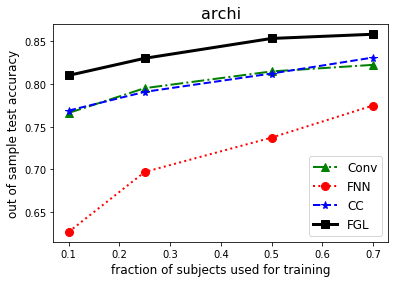

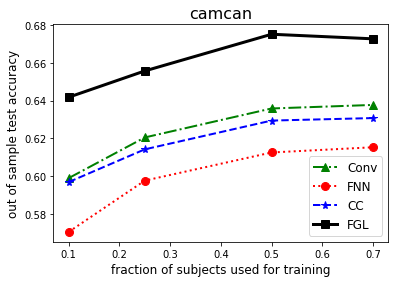

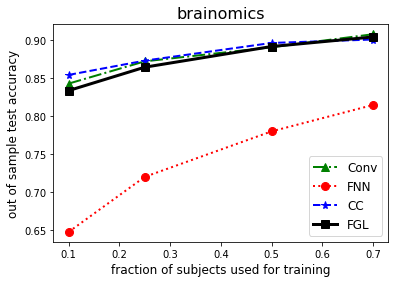

In [175]:
baselw = 2
markersize = 8

plotting_params = {
    'lin': {'label': 'FNN', 'marker': 'o', 'linestyle':':', 'color':'r', 'linewidth': baselw, 'markersize':markersize},
    'cc': {'label': 'CC', 'marker': '*', 'linestyle':'--', 'color':'b', 'linewidth': baselw, 'markersize':markersize},
    'conv': {'label': 'Conv', 'marker': '^', 'linestyle':'-.', 'color':'g', 'linewidth': baselw, 'markersize':markersize},
    'smallerfgl_213_sum_tree': {'label': 'FGL', 'marker': 's', 'linestyle':'-', 'color':'k', 'linewidth': 3, 'markersize':markersize},
}

od = "/data/brain_/gcn/outputs/multi_run"
dataset = "archi"
for dataset in ["archi", "camcan", "brainomics"]:
    training_fracs = [0.1, 0.25, 0.5, 0.7]
    models = ["smallerfgl_213_sum_tree", "lin", "conv", "cc"] # ["fc", "lin", "lin_", "conv", "conv_", "cc", "smallerfgl_213_sum_tree"]
    accs = defaultdict(list)
    stds = defaultdict(list)
    for frac, mt in itertools.product(training_fracs, models):
        runcode = dataset + '_tf{}'.format(frac)
        chk = torch.load(os.path.join(od, mt, runcode, "last_metrics.checkpoint"))
        frac_accs = []
        frac_loss = []
        for i in range(10):
            tochk = torch.load(os.path.join(od, mt, runcode, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
            ochk = torch.load(os.path.join(od, mt, runcode, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
            frac_accs.append(ochk[-1]["accuracy"])
            frac_loss.append(tochk[-1]["loss"])
        accs[mt].append(np.mean(frac_accs))
        stds[mt].append(np.std(frac_accs))
        print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(runcode, mt, chk['accuracy'], np.std(frac_accs), np.mean(frac_loss)))

    plt.figure()
    plt.title('{}'.format(dataset), fontsize=16)
    for mt, mt_accs in accs.items():
        plt.errorbar(training_fracs, mt_accs, **plotting_params[mt])
    plt.legend(loc='lower right', fontsize=12)
    plt.xlabel('fraction of subjects used for training', fontsize=12)
    plt.ylabel('out of sample test accuracy', fontsize=12)

In [ ]:
reduction = np.mean
for metric in ['f1', 'precision', 'recall']:
    for dataset in ["hcp", "la5c", "archi", "camcan", "brainomics"]:
        models = ["smallerfgl_213_sum_tree", "lin", "conv", "cc"] # ["fc", "lin", "lin_", "conv", "conv_", "cc", "smallerfgl_213_sum_tree"]
        accs = defaultdict(list)
        stds = defaultdict(list)
        runcode = dataset + '0'# '_tf{}'.format(frac)
        chk = torch.load(os.path.join(od, mt, runcode, "last_metrics.checkpoint"))
        reduction(chk[metric])
#             frac_accs = []
#             frac_loss = []
#             for i in range(10):
#                 tochk = torch.load(os.path.join(od, mt, runcode, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
#                 ochk = torch.load(os.path.join(od, mt, runcode, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
#                 frac_accs.append(ochk[-1][metric])
#                 frac_loss.append(tochk[-1]["loss"])
#             accs[mt].append(np.mean(frac_accs))
#             stds[mt].append(np.std(frac_accs))
#             print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(runcode, mt, chk['accuracy'], np.std(frac_accs), np.mean(frac_loss)))

        plt.figure()
        plt.title('{}'.format(dataset), fontsize=16)
        for mt, mt_accs in accs.items():
            plt.errorbar(training_fracs, mt_accs, **plotting_params[mt])
        plt.legend(loc='lower right', fontsize=12)
        plt.xlabel('fraction of subjects used for training', fontsize=12)
        plt.ylabel('out of sample test accuracy', fontsize=12)

KeyError: 'non_speech'

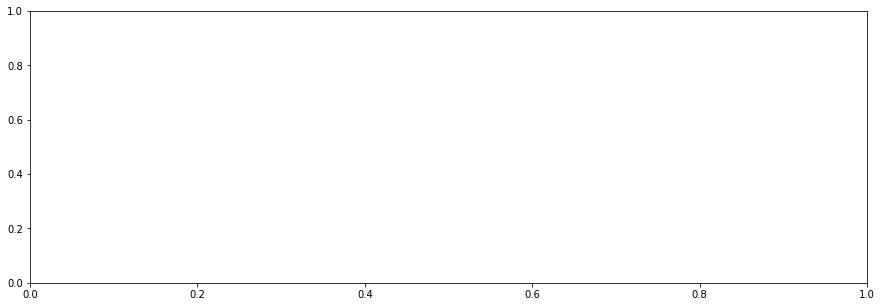

In [211]:
baselw = 2
markersize = 8

opacity = 0.4

plotting_params = {
    'lin': {'label': 'FNN', 'color':'r', 'alpha': opacity},
    'cc': {'label': 'CC', 'color':'b', 'alpha': opacity},
    'conv': {'label': 'Conv', 'color':'g', 'alpha': opacity},
    'smallerfgl_213_sum_tree': {'label': 'FGL', 'color':'k', 'alpha': opacity},
}


od = "/data/brain_/gcn/outputs/multi_run"
ds = dataset = "archi"
frac = 0.7
models = ["smallerfgl_213_sum_tree", "lin", "conv", "cc"]
f1s = defaultdict(dict)
for mt in models:
    runcode = dataset + '0' #'_tf{}'.format(frac)
    chk = torch.load(os.path.join(od, mt, runcode, "last_metrics.checkpoint"))
    args = torch.load(os.path.join(od, mt, runcode, "args.checkpoint"))
#     print(mt)
#     print(args.meta['i2c'])
#     print(chk['f1'])
    for i, c in args.meta['i2c'].items():
        f1s[mt][c] = chk['f1'][i]
allc = list(set(sum([list(f1s[mt].keys()) for mt in models], [])))

ngroups = len(allc)
bar_width = 4 / ngroups
index = np.arange(ngroups)

fig = plt.figure(figsize=(15, 5))
ax = plt.gca()
for i, mt in enumerate(models):
    rects = ax.bar(index + i * bar_width, [f1s[mt][c] for c in allc], bar_width, **plotting_params[mt])

ax.set_xlabel('Label')
ax.set_ylabel('F1')
ax.set_title('F1 by model and label')
plt.xticks(rotation='vertical')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(allc) # list(range(len(allc))))
ax.legend()

fig.tight_layout()
plt.show()

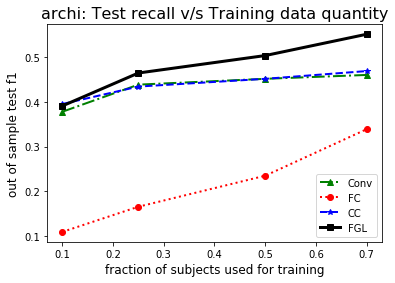

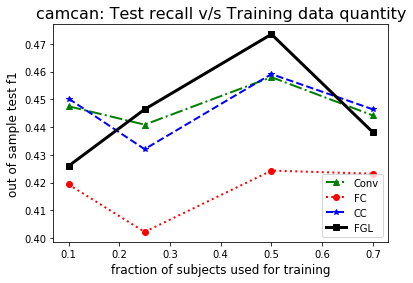

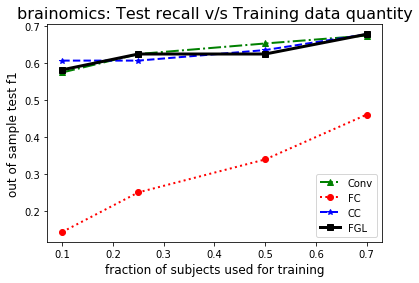

In [176]:
baselw = 2
plotting_params = {
    'lin': {'label': 'FC', 'marker': 'o', 'linestyle':':', 'color':'r', 'linewidth': baselw},
    'cc': {'label': 'CC', 'marker': '*', 'linestyle':'--', 'color':'b', 'linewidth': baselw},
    'conv': {'label': 'Conv', 'marker': '^', 'linestyle':'-.', 'color':'g', 'linewidth': baselw},
    'smallerfgl_213_sum_tree': {'label': 'FGL', 'marker': 's', 'linestyle':'-', 'color':'k', 'linewidth': 3},
}
metric_name = 'recall'
od = "/data/brain_/gcn/outputs/multi_run"
dataset = "archi"
for dataset in ["archi", "camcan", "brainomics"]:
    training_fracs = [0.1, 0.25, 0.5, 0.7]
    models = ["smallerfgl_213_sum_tree", "lin", "conv", "cc"] # ["fc", "lin", "lin_", "conv", "conv_", "cc", "smallerfgl_213_sum_tree"]
    accs = defaultdict(list)
    stds = defaultdict(list)
    for frac, mt in itertools.product(training_fracs, models):
        runcode = dataset + '_tf{}'.format(frac)
        chk = torch.load(os.path.join(od, mt, runcode, "last_metrics.checkpoint"))
        frac_accs = []
        frac_loss = []
        for i in range(10):
            tochk = torch.load(os.path.join(od, mt, runcode, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
            ochk = torch.load(os.path.join(od, mt, runcode, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
            frac_accs.append(np.min(ochk[-1][metric_name]))
            frac_loss.append(tochk[-1]["loss"])
        accs[mt].append(np.mean(frac_accs))
        stds[mt].append(np.std(frac_accs))

    plt.figure()
    plt.title('{}: Test {} v/s Training data quantity'.format(dataset, metric_name), fontsize=16)
    for mt, mt_accs in accs.items():
        plt.errorbar(training_fracs, mt_accs, **plotting_params[mt])
    plt.legend(loc='lower right')
    plt.xlabel('fraction of subjects used for training', fontsize=12)
    plt.ylabel('out of sample test f1', fontsize=12)

Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix
Normalized confusion matrix


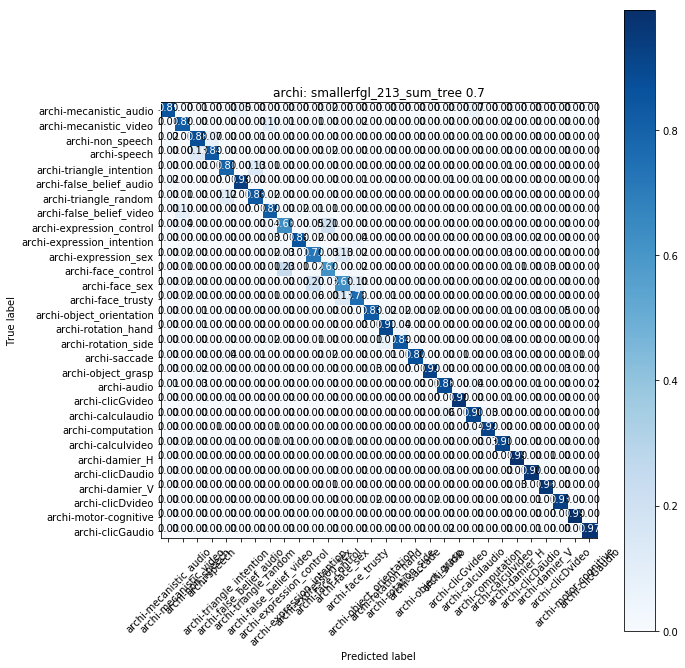

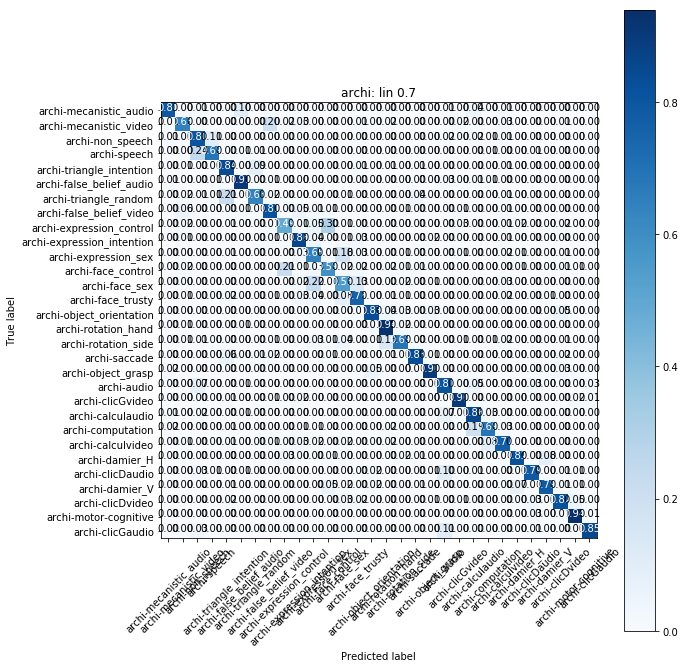

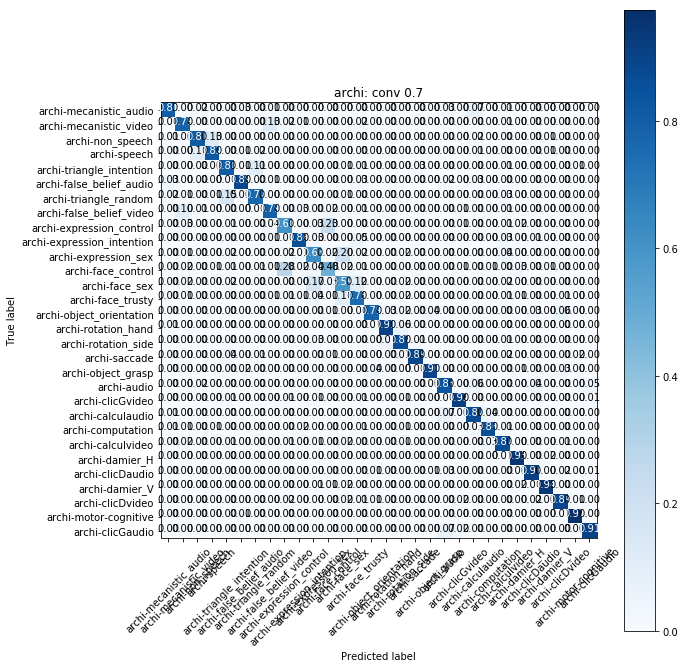

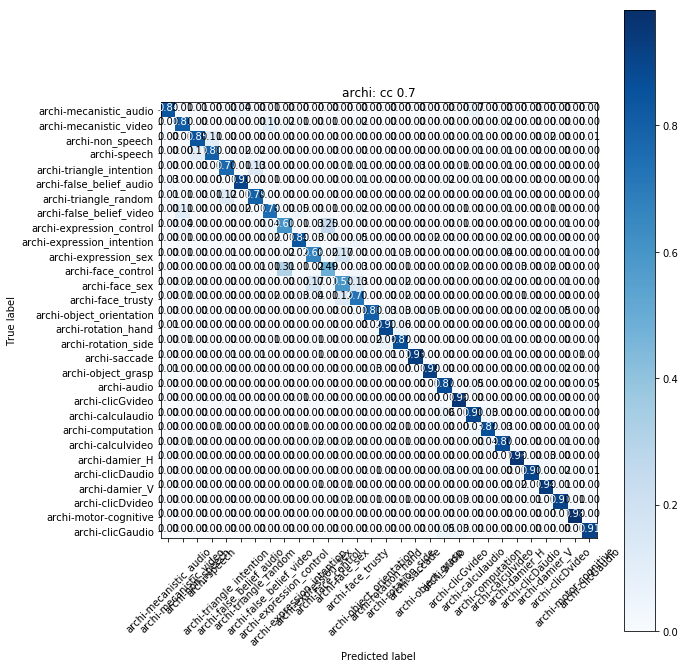

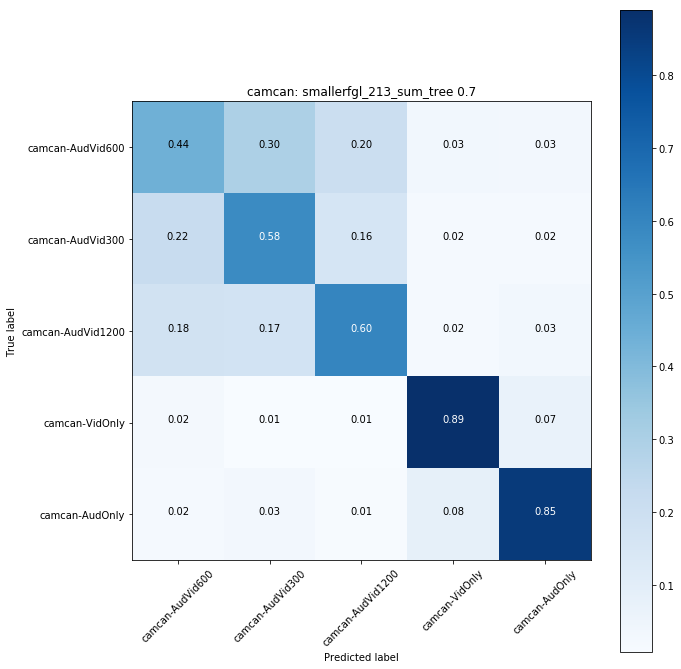

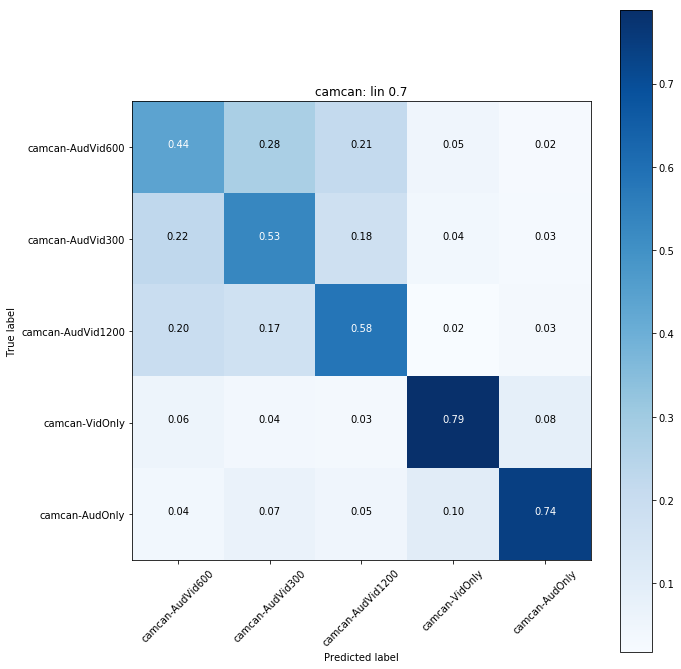

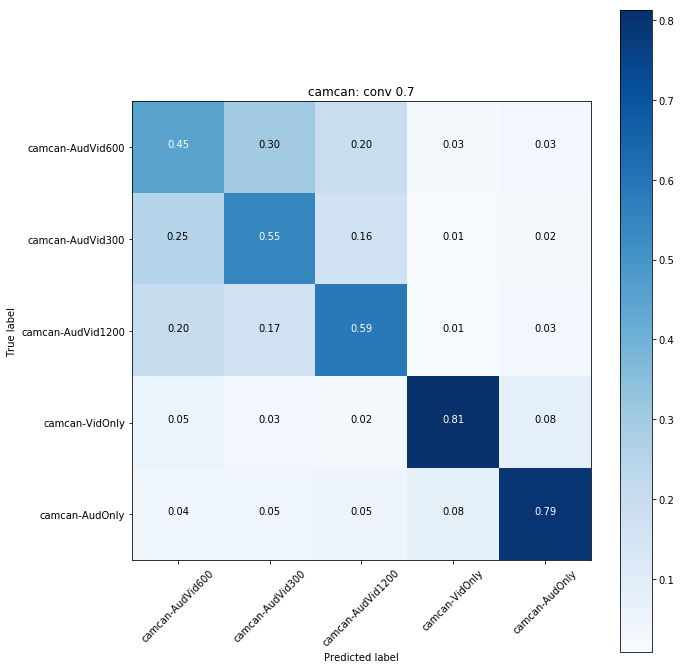

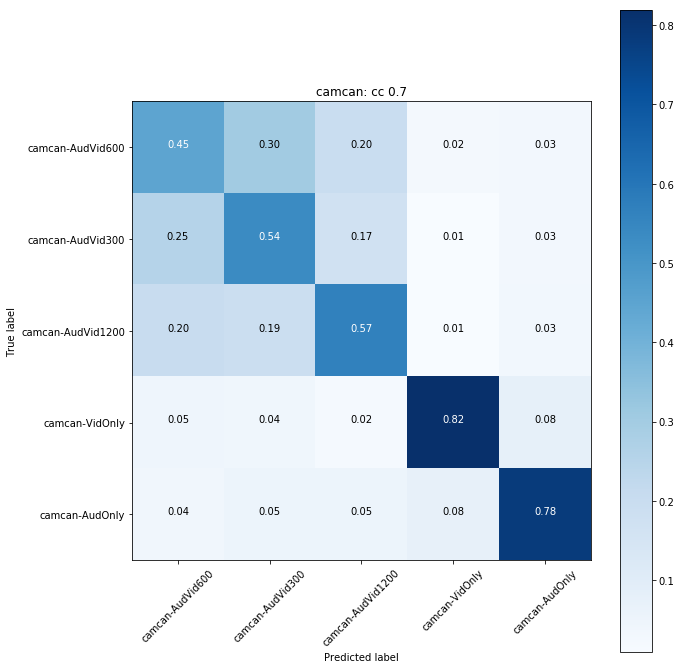

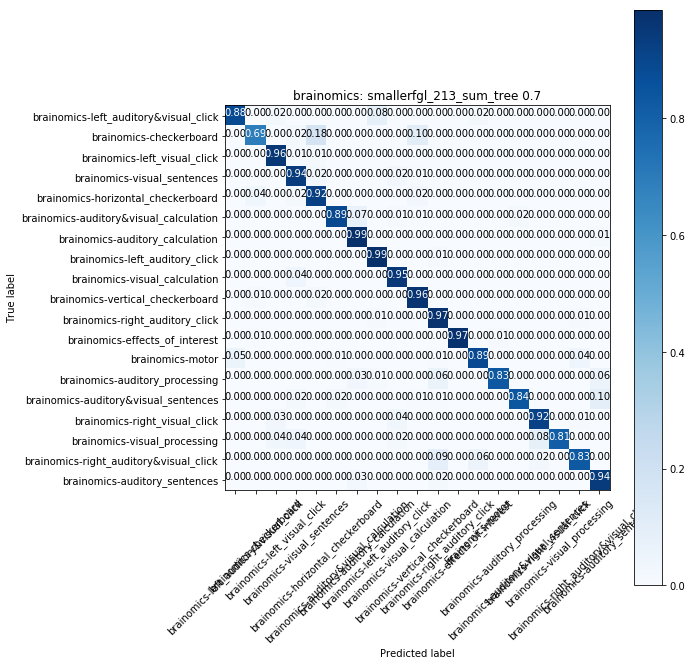

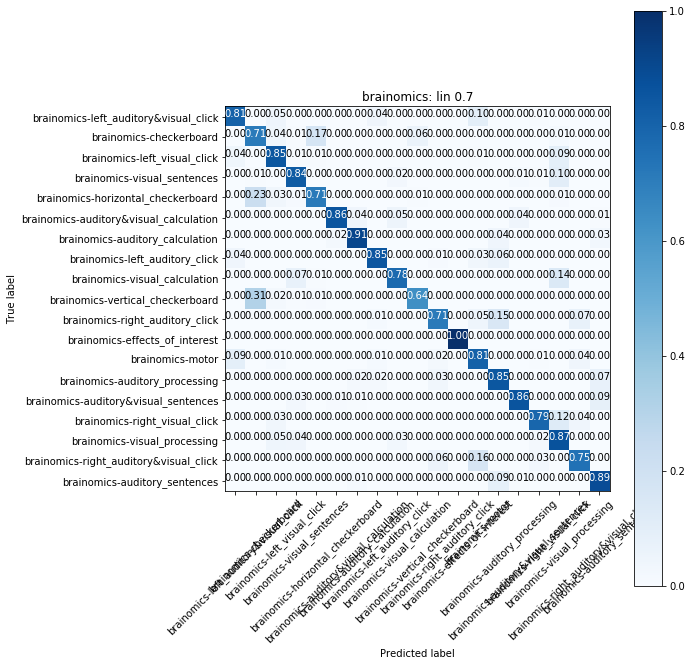

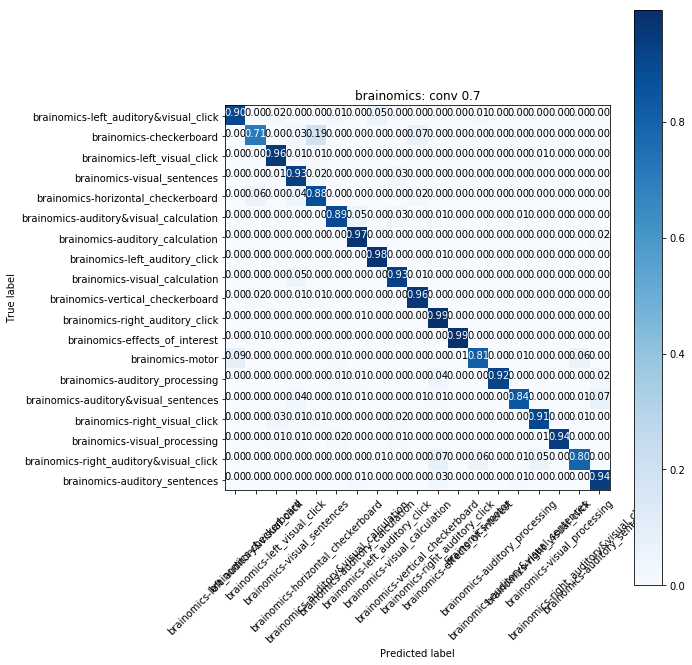

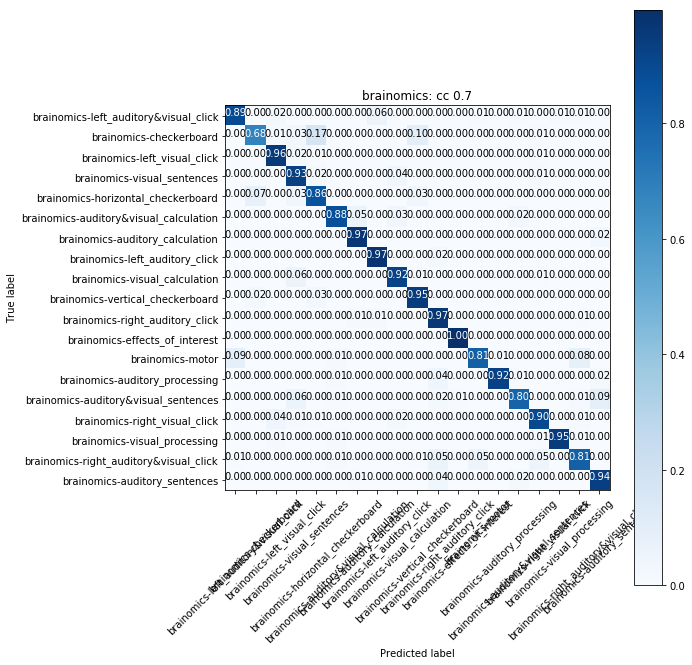

In [164]:
for dataset in ["archi", "camcan", "brainomics"]:
    training_fracs = [0.7] # [0.1, 0.25, 0.5, 0.7]
    models = ["smallerfgl_213_sum_tree", "lin", "conv", "cc"] # ["fc", "lin", "lin_", "conv", "conv_", "cc", "smallerfgl_213_sum_tree"]
    accs = defaultdict(list)
    stds = defaultdict(list)
    for frac, mt in itertools.product(training_fracs, models):
        runcode = dataset + '_tf{}'.format(frac)
        args = torch.load(os.path.join(od, mt, runcode, "args.checkpoint"))
        chk = torch.load(os.path.join(od, mt, runcode, "last_metrics.checkpoint"))
        plt.figure(figsize=(10, 10))
        plot_confusion_matrix(
            chk['cm'], 
            [args.meta['i2c'][i] for i in range(len(args.meta['i2c']))], 
            normalize=True, 
            title='{}: {} {}'.format(dataset, mt, str(frac)))

In [155]:
chk['cm']

(30, 30)

In [28]:
(0.8616 - 0.84) / (0.02 / np.sqrt(10))

3.4152598729818595

# Junk and experimentation follow

In [66]:
ds = "archi0"
models = ["fgl_213_sum_tree", "conv"]  # , "fc", "lin", "cc"]
chks = {}
prefix = "test"
for md in models:
    chks[md] = torch.load("/data/brain_/gcn/outputs/multi_run/{}/{}/outer_split0/{}_metrics_per_epoch.checkpoint".format(md, ds, prefix))

conv: end accuracy=0.8130434782608695
fgl_213_sum_tree: end accuracy=0.8376811594202899


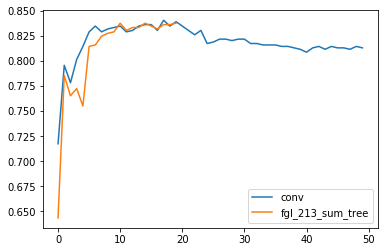

In [67]:
metric = "accuracy"
for k, chk in chks.items():
    plt.plot([chk[i][metric] for i in range(len(chk))], label=k)
    print("{}: end {}={}".format(k, metric, chk[-1][metric]))
plt.legend(loc='best')

In [30]:
outputs_dir = ["/data/brain_/transfer/outputs/multi_run"]
models = ["lin", "smallerfgl_213_sum_tree"] # "lin_", "randomfgl_213_sum_packed1.0"] # , "rfgl"]
run_ids = ["run0_drp"] # , "run0_drp"]
for od, mt, rd  in itertools.product(outputs_dir, models, run_ids):
    chk = torch.load(os.path.join(od, mt, rd, "last_metrics.checkpoint"))
    accs = {study: [] for study in chk.keys()}
    losses = {study: [] for study in chk.keys()}
    for i in range(10):
        ochk = torch.load(os.path.join(od, mt, rd, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        tochk = torch.load(os.path.join(od, mt, rd, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))

        for study in accs.keys():
            accs[study].append(ochk[-1][study]["accuracy"])
            losses[study].append(tochk[-1][study]["loss"])
    for study in accs.keys():
#         print("{} {}: mean acc={:.4f} std={:.4f}".format(study, mt, np.mean(accs[study]), np.std(accs[study])))
        print("{} {}: mean acc={:.4f} loss={:.4f} std={:.4f}".format(study, mt, np.mean(accs[study]), np.mean(losses[study]), np.std(accs[study])))

archi lin: mean acc=0.8494 loss=0.0533 std=0.0131
la5c lin: mean acc=0.6089 loss=0.2632 std=0.0222
hcp lin: mean acc=0.9268 loss=0.2943 std=0.0039
archi smallerfgl_213_sum_tree: mean acc=0.8641 loss=0.0232 std=0.0178
la5c smallerfgl_213_sum_tree: mean acc=0.6226 loss=1.1832 std=0.0177
hcp smallerfgl_213_sum_tree: mean acc=0.9271 loss=0.5662 std=0.0047


### Toy experiment (clevr) results

In [65]:
# Smaller dataset sizes

from collections import defaultdict
outputs_dir = ["/data/brain_/clevr/outputs/multi_run"]
models = ["fc", "conv", "cc", "complexwedgefgl"]

datasets = ["complexwedges"]  # ["somewhat", "notso", "bignotso"]
fracs = [0.1, 0.5, 1, 5, 10, 20, 25, 30, 40, 45, 50]  # [20, 40, 50, 75]
datasets = [ x + str(y) for x in datasets for y in fracs]
accs_dict = defaultdict(list)
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
    accs_dict[mt].append(np.mean(accs))
    print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(ds, mt, chk['accuracy'], np.std(accs), np.mean(loss)))
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

complexwedges1 fc: mean acc=0.9601 std=0.0022 loss=0.0058
complexwedges1 conv: mean acc=0.6412 std=0.2795 loss=28.9757
complexwedges1 cc: mean acc=0.1228 std=0.0028 loss=51.1531
complexwedges1 complexwedgefgl: mean acc=0.9651 std=0.0047 loss=0.0636
complexwedges5 fc: mean acc=0.9742 std=0.0020 loss=0.0000
complexwedges5 conv: mean acc=0.9664 std=0.0032 loss=0.0007
complexwedges5 cc: mean acc=0.9679 std=0.0055 loss=0.0954
complexwedges5 complexwedgefgl: mean acc=0.9832 std=0.0022 loss=0.0000
complexwedges10 fc: mean acc=0.9749 std=0.0016 loss=0.0000
complexwedges10 conv: mean acc=0.9706 std=0.0030 loss=0.0000
complexwedges10 cc: mean acc=0.9721 std=0.0016 loss=0.0000
complexwedges10 complexwedgefgl: mean acc=0.9847 std=0.0014 loss=0.0000
complexwedges20 fc: mean acc=0.9764 std=0.0023 loss=0.0000
complexwedges20 conv: mean acc=0.9744 std=0.0024 loss=0.0000
complexwedges20 cc: mean acc=0.9752 std=0.0022 loss=0.0000
complexwedges20 complexwedgefgl: mean acc=0.9863 std=0.0013 loss=0.0000
co

Text(0.5,1,'Test acc v/s fraction of data for training')

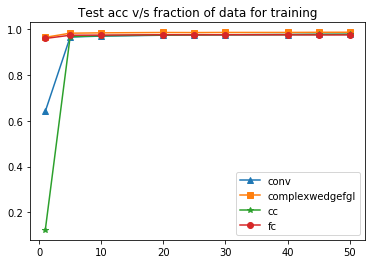

In [66]:
plotting_params = {
    'fc': {'marker': 'o',},
    'cc': {'marker': '*',},
    'conv': {'marker': '^',},
    'complexwedgefgl': {'marker': 's',},
}
for mt in accs_dict.keys():
    plt.plot(fracs[:len(accs_dict[mt])], accs_dict[mt], label=mt, **plotting_params[mt])
plt.legend(loc='best')
plt.title('Test acc v/s fraction of data for training')

In [90]:
# Larger dataset sizes
from collections import defaultdict
outputs_dir = ["/data/brain_/clevr/outputs/multi_run"]
# models = ["fc", "conv", "cc", "complexwedgefgl"]
# datasets = ["complexwedges50000"]  # ["somewhat", "notso", "bignotso"]
# fracs = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
models = ["fc", "conv", "cc", "regionfgl"]
datasets = ['iidxclustergrid50000']
fracs = [0.01, 0.1, 0.25, 0.5, 0.8]

datasets = [ x + str(int(1000 * y)) for x in datasets for y in fracs]
accs_dict = defaultdict(list)
stds_dict = defaultdict(list)
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
    accs_dict[mt].append(np.mean(accs))
    stds_dict[mt].append(np.std(accs))
    print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(ds, mt, chk['accuracy'], np.std(accs), np.mean(loss)))
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

iidxclustergrid5000010 fc: mean acc=0.1458 std=0.0039 loss=0.0000
iidxclustergrid5000010 conv: mean acc=0.1341 std=0.0051 loss=44.2583
iidxclustergrid5000010 cc: mean acc=0.1340 std=0.0053 loss=53.4166
iidxclustergrid5000010 regionfgl: mean acc=0.1466 std=0.0037 loss=0.0000
iidxclustergrid50000100 fc: mean acc=0.1878 std=0.0075 loss=0.2077
iidxclustergrid50000100 conv: mean acc=0.2478 std=0.0561 loss=54.6345
iidxclustergrid50000100 cc: mean acc=0.2634 std=0.0570 loss=53.9494
iidxclustergrid50000100 regionfgl: mean acc=0.2134 std=0.0077 loss=0.0000
iidxclustergrid50000250 fc: mean acc=0.2317 std=0.0066 loss=0.4081
iidxclustergrid50000250 conv: mean acc=0.3295 std=0.0652 loss=52.7917
iidxclustergrid50000250 cc: mean acc=0.3502 std=0.0076 loss=51.8118
iidxclustergrid50000250 regionfgl: mean acc=0.3553 std=0.0148 loss=0.3861
iidxclustergrid50000500 fc: mean acc=0.2942 std=0.0112 loss=1.3429
iidxclustergrid50000500 conv: mean acc=0.3663 std=0.0044 loss=51.7503
iidxclustergrid50000500 cc: me

Text(0.5,1,'Test acc v/s fraction of data for training')

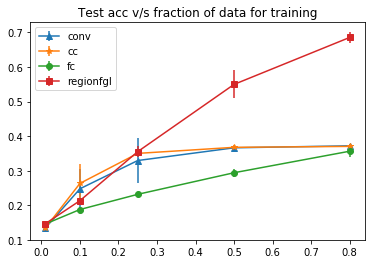

In [92]:
plotting_params = {
    'fc': {'marker': 'o',},
    'cc': {'marker': '*',},
    'conv': {'marker': '^',},
    'complexwedgefgl': {'marker': 's',},
    'regionfgl': {'marker': 's',},
}
for mt in accs_dict.keys():
    plt.errorbar(fracs[:len(accs_dict[mt])], accs_dict[mt], yerr=stds_dict[mt], label=mt, **plotting_params[mt])
plt.legend(loc='best')
plt.title('Test acc v/s fraction of data for training')

In [93]:
# Larger dataset sizes
from collections import defaultdict
outputs_dir = ["/data/brain_/clevr/outputs/multi_run"]
# models = ["fc", "conv", "cc", "complexwedgefgl"]
# datasets = ["complexwedges50000"]  # ["somewhat", "notso", "bignotso"]
# fracs = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
models = ["fc", "conv", "cc", "regionfgl"]
datasets = ['iidhclustergrid50000']
fracs = [0.01, 0.1, 0.25, 0.5, 0.8]

datasets = [ x + str(int(1000 * y)) for x in datasets for y in fracs]
accs_dict = defaultdict(list)
stds_dict = defaultdict(list)
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
    accs_dict[mt].append(np.mean(accs))
    stds_dict[mt].append(np.std(accs))
    print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(ds, mt, chk['accuracy'], np.std(accs), np.mean(loss)))
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

plotting_params = {
    'fc': {'marker': 'o',},
    'cc': {'marker': '*',},
    'conv': {'marker': '^',},
    'complexwedgefgl': {'marker': 's',},
    'regionfgl': {'marker': 's',},
}
for mt in accs_dict.keys():
    plt.errorbar(fracs[:len(accs_dict[mt])], accs_dict[mt], yerr=stds_dict[mt], label=mt, **plotting_params[mt])
plt.legend(loc='best')
plt.title('Test acc v/s fraction of data for training')

iidhclustergrid5000010 fc: mean acc=0.2718 std=0.0218 loss=17.9078
iidhclustergrid5000010 conv: mean acc=0.3805 std=0.0106 loss=46.3188
iidhclustergrid5000010 cc: mean acc=0.3788 std=0.0093 loss=46.5264
iidhclustergrid5000010 regionfgl: mean acc=0.3426 std=0.0123 loss=11.3806
iidhclustergrid50000100 fc: mean acc=0.2578 std=0.0182 loss=16.4824
iidhclustergrid50000100 conv: mean acc=0.4143 std=0.0049 loss=49.0196
iidhclustergrid50000100 cc: mean acc=0.4129 std=0.0042 loss=49.1596
iidhclustergrid50000100 regionfgl: mean acc=0.3003 std=0.0121 loss=10.7498
iidhclustergrid50000250 fc: mean acc=0.2698 std=0.0113 loss=24.5776
iidhclustergrid50000250 conv: mean acc=0.4151 std=0.0062 loss=49.1965
iidhclustergrid50000250 cc: mean acc=0.4156 std=0.0052 loss=49.4334
iidhclustergrid50000250 regionfgl: mean acc=0.3135 std=0.0106 loss=20.5949


FileNotFoundError: [Errno 2] No such file or directory: '/data/brain_/clevr/outputs/multi_run/fc/iidhclustergrid50000500/last_metrics.checkpoint'

bayesian160001 fc: mean acc=0.3065 std=0.0543 loss=9.4629
bayesian160001 conv: mean acc=0.0752 std=0.0296 loss=44.7697
bayesian160001 cc: mean acc=0.0618 std=0.0062 loss=45.2936
bayesian160001 regionfgl: mean acc=0.2701 std=0.0290 loss=19.3847
bayesian1600010 fc: mean acc=0.6559 std=0.0491 loss=7.6626
bayesian1600010 conv: mean acc=0.0925 std=0.0312 loss=85.6485
bayesian1600010 cc: mean acc=0.0837 std=0.0236 loss=87.9846
bayesian1600010 regionfgl: mean acc=0.9968 std=0.0073 loss=1.5086
bayesian16000100 fc: mean acc=1.0000 std=0.0000 loss=0.0000
bayesian16000100 conv: mean acc=0.8456 std=0.0893 loss=12.8387
bayesian16000100 cc: mean acc=0.8663 std=0.0751 loss=11.7706
bayesian16000100 regionfgl: mean acc=1.0000 std=0.0000 loss=0.0000
bayesian16000250 fc: mean acc=1.0000 std=0.0000 loss=0.0000
bayesian16000250 conv: mean acc=0.9624 std=0.0275 loss=3.6761
bayesian16000250 cc: mean acc=0.9639 std=0.0201 loss=3.8059
bayesian16000250 regionfgl: mean acc=1.0000 std=0.0000 loss=0.0000
bayesian1

Text(0.5,1,'Test acc v/s fraction of data for training')

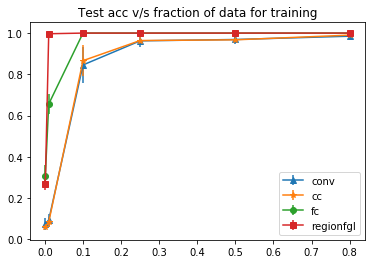

In [94]:
# Larger dataset sizes
from collections import defaultdict
outputs_dir = ["/data/brain_/clevr/outputs/multi_run"]
# models = ["fc", "conv", "cc", "complexwedgefgl"]
# datasets = ["complexwedges50000"]  # ["somewhat", "notso", "bignotso"]
# fracs = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
models = ["fc", "conv", "cc", "regionfgl"]
datasets = ['bayesian16000']
fracs = [0.001, 0.01, 0.1, 0.25, 0.5, 0.8]

datasets = [ x + str(int(1000 * y)) for x in datasets for y in fracs]
accs_dict = defaultdict(list)
stds_dict = defaultdict(list)
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
    accs_dict[mt].append(np.mean(accs))
    stds_dict[mt].append(np.std(accs))
    print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(ds, mt, chk['accuracy'], np.std(accs), np.mean(loss)))
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

plotting_params = {
    'fc': {'marker': 'o',},
    'cc': {'marker': '*',},
    'conv': {'marker': '^',},
    'complexwedgefgl': {'marker': 's',},
    'regionfgl': {'marker': 's',},
}
for mt in accs_dict.keys():
    plt.errorbar(fracs[:len(accs_dict[mt])], accs_dict[mt], yerr=stds_dict[mt], label=mt, **plotting_params[mt])
plt.legend(loc='best')
plt.title('Test acc v/s fraction of data for training')

blockybayesian160001 fc: mean acc=0.2760 std=0.0589 loss=17.0675
blockybayesian160001 conv: mean acc=0.0704 std=0.0234 loss=44.9483
blockybayesian160001 cc: mean acc=0.0629 std=0.0089 loss=45.2481
blockybayesian160001 regionfgl: mean acc=0.3174 std=0.0562 loss=20.4965
blockybayesian1600010 fc: mean acc=0.5661 std=0.0864 loss=32.5402
blockybayesian1600010 conv: mean acc=0.1281 std=0.0278 loss=82.7901
blockybayesian1600010 cc: mean acc=0.1107 std=0.0565 loss=86.0446
blockybayesian1600010 regionfgl: mean acc=0.9614 std=0.0217 loss=4.9380
blockybayesian16000100 fc: mean acc=0.9996 std=0.0007 loss=0.0174
blockybayesian16000100 conv: mean acc=0.8535 std=0.0694 loss=14.0393
blockybayesian16000100 cc: mean acc=0.8221 std=0.0785 loss=16.1269
blockybayesian16000100 regionfgl: mean acc=1.0000 std=0.0000 loss=0.0000
blockybayesian16000250 fc: mean acc=1.0000 std=0.0001 loss=0.0013
blockybayesian16000250 conv: mean acc=0.9294 std=0.0514 loss=7.7895
blockybayesian16000250 cc: mean acc=0.9298 std=0.0

Text(0.5,1,'Test acc v/s fraction of data for training')

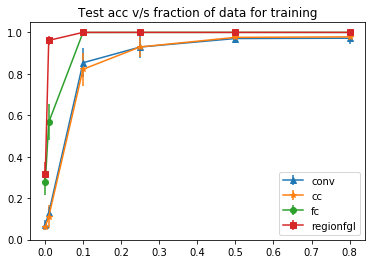

In [95]:
# Larger dataset sizes
from collections import defaultdict
outputs_dir = ["/data/brain_/clevr/outputs/multi_run"]
# models = ["fc", "conv", "cc", "complexwedgefgl"]
# datasets = ["complexwedges50000"]  # ["somewhat", "notso", "bignotso"]
# fracs = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
models = ["fc", "conv", "cc", "regionfgl"]
datasets = ['blockybayesian16000']
fracs = [0.001, 0.01, 0.1, 0.25, 0.5, 0.8]

datasets = [ x + str(int(1000 * y)) for x in datasets for y in fracs]
accs_dict = defaultdict(list)
stds_dict = defaultdict(list)
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
    accs_dict[mt].append(np.mean(accs))
    stds_dict[mt].append(np.std(accs))
    print("{} {}: mean acc={:.4f} std={:.4f} loss={:.4f}".format(ds, mt, chk['accuracy'], np.std(accs), np.mean(loss)))
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

plotting_params = {
    'fc': {'marker': 'o',},
    'cc': {'marker': '*',},
    'conv': {'marker': '^',},
    'complexwedgefgl': {'marker': 's',},
    'regionfgl': {'marker': 's',},
}
for mt in accs_dict.keys():
    plt.errorbar(fracs[:len(accs_dict[mt])], accs_dict[mt], yerr=stds_dict[mt], label=mt, **plotting_params[mt])
plt.legend(loc='best')
plt.title('Test acc v/s fraction of data for training')